<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_6/Competitive_DS_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.2.3

Объявите модель StackingClassifier(), которая в качестве базовых моделей будет принимать список estimators, а в качестве мета-модели использует LogisticRegression().

Пример estimators:
estimators = [("logreg", LogisticRegression()), ("svc", SVC())]

In [ ]:
from sklearn.ensemble import StackingClassifier

meta_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

#6.2.4

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/825511/meta_feautres_data.csv')
df.head()

,index,target,model
0,0,65.927922,catboost
1,1,44.248116,catboost
2,2,43.807966,catboost
3,3,45.661121,catboost
4,4,43.653036,catboost


In [ ]:
import numpy as np

In [ ]:
df_ = pd.pivot_table(df,
                     index=["index"],
                     columns=['model'], 
              #  aggfunc=['diff']
               )
df_.columns = ['target_catboost', 'target_lgbm', 'target_xgb']
df_

,target_catboost,target_lgbm,target_xgb
index,,,
0,65.927922,49.622930,55.741352
1,44.248116,43.244205,42.661655
2,43.807966,45.389293,42.217470
3,45.661121,44.769051,40.969734
4,43.653036,40.462658,38.243040
...,...,...,...
580,43.372847,44.205443,39.795555
581,44.168977,42.959736,42.351254
582,44.393186,43.844842,44.074200


In [ ]:
df_.reset_index(inplace=True)
df_

,index,target_catboost,target_lgbm,target_xgb
0,0,65.927922,49.622930,55.741352
1,1,44.248116,43.244205,42.661655
2,2,43.807966,45.389293,42.217470
3,3,45.661121,44.769051,40.969734
4,4,43.653036,40.462658,38.243040
...,...,...,...,...
580,580,43.372847,44.205443,39.795555
581,581,44.168977,42.959736,42.351254
582,582,44.393186,43.844842,44.074200
583,583,43.649487,46.200331,40.630420


In [ ]:
#1
df_['catboost_div_lgbm'] = df_['target_catboost'] / df_['target_lgbm']
#2
df_['catboost_dif_lgbm'] = df_['target_catboost'] - df_['target_lgbm']
#3
df_['catboost_div_xgb'] = df_['target_catboost'] / df_['target_xgb']
#4
df_['catboost_dif_xgb'] = df_['target_catboost'] - df_['target_xgb']


#5
df_['catboost_div_catboost'] = df_['target_catboost'] / df_['target_catboost']
#6
df_['catboost_dif_catboost'] = df_['target_catboost'] - df_['target_catboost']




#7
df_['lgbm_div_catboost'] = df_['target_lgbm']  / df_['target_catboost']
#8
df_['lgbm_dif_catboost'] = df_['target_lgbm']  - df_['target_catboost']
#9
df_['lgbm_div_xgb'] = df_['target_lgbm']  / df_['target_xgb']
#10
df_['lgbm_dif_xgb'] = df_['target_lgbm']  - df_['target_xgb']

#11
df_['lgbm_div_lgbm'] = df_['target_lgbm']  / df_['target_lgbm']
#12
df_['lgbm_dif_lgbm'] = df_['target_lgbm']  - df_['target_lgbm']


#13
df_['xgb_div_catboost'] = df_['target_xgb']  / df_['target_catboost']
#14
df_['xgb_dif_catboost'] = df_['target_xgb']  - df_['target_catboost']
#15
df_['xgb_div_lgbm'] = df_['target_xgb']  / df_['target_lgbm']
#16
df_['xgb_dif_lgbm'] = df_['target_xgb']  - df_['target_lgbm']


#17
df_['xgb_div_xgb'] = df_['target_xgb']  / df_['target_xgb']
#18
df_['xgb_dif_xgb'] = df_['target_xgb']  - df_['target_xgb']


df_

,index,target_catboost,target_lgbm,target_xgb,catboost_div_lgbm,catboost_dif_lgbm,catboost_div_xgb,catboost_dif_xgb,lgbm_div_catboost,lgbm_div_xgb,...,xgb_div_catboost,xgb_dif_catboost,xgb_div_lgbm,xgb_dif_lgbm,catboost_div_catboost,catboost_dif_catboost,lgbm_div_lgbm,lgbm_dif_lgbm,xgb_div_xgb,xgb_dif_xgb
0,0,65.927922,49.622930,55.741352,1.328578,16.304993,1.182747,10.186570,0.752685,0.890235,...,0.845489,-10.186570,1.123298,6.118422,1.0,0.0,1.0,0.0,1.0,0.0
1,1,44.248116,43.244205,42.661655,1.023215,1.003911,1.037187,1.586461,0.977312,1.013655,...,0.964146,-1.586461,0.986529,-0.582550,1.0,0.0,1.0,0.0,1.0,0.0
2,2,43.807966,45.389293,42.217470,0.965161,-1.581327,1.037674,1.590496,1.036097,1.075131,...,0.963694,-1.590496,0.930120,-3.171823,1.0,0.0,1.0,0.0,1.0,0.0
3,3,45.661121,44.769051,40.969734,1.019926,0.892070,1.114509,4.691387,0.980463,1.092735,...,0.897256,-4.691387,0.915135,-3.799317,1.0,0.0,1.0,0.0,1.0,0.0
4,4,43.653036,40.462658,38.243040,1.078847,3.190378,1.141464,5.409996,0.926915,1.058040,...,0.876068,-5.409996,0.945144,-2.219618,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,580,43.372847,44.205443,39.795555,0.981165,-0.832596,1.089892,3.577292,1.019196,1.110814,...,0.917522,-3.577292,0.900241,-4.409888,1.0,0.0,1.0,0.0,1.0,0.0
581,581,44.168977,42.959736,42.351254,1.028148,1.209241,1.042920,1.817723,0.972622,1.014368,...,0.958846,-1.817723,0.985836,-0.608482,1.0,0.0,1.0,0.0,1.0,0.0
582,582,44.393186,43.844842,44.074200,1.012506,0.548344,1.007237,0.318986,0.987648,0.994796,...,0.992815,-0.318986,1.005231,0.229358,1.0,0.0,1.0,0.0,1.0,0.0
583,583,43.649487,46.200331,40.630420,0.944787,-2.550844,1.074306,3.019067,1.058439,1.137087,...,0.930834,-3.019067,0.879440,-5.569911,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_.to_csv('try_0.csv', index=False)

In [ ]:
preds = pd.read_csv('https://stepik.org/media/attachments/lesson/825511/meta_feautres_data.csv')

ensemble = pd.pivot_table(preds, index='index', columns=['model'], values=['target']).reset_index()
ensemble.columns = ['_'.join(el) for el in ensemble.columns]

model_names = ['catboost', 'lgbm', 'xgb']
for i in range(3):
    for j in range(3):
        ensemble[f'{model_names[i]}_div_{model_names[j]}'] = ensemble['target_' + model_names[i]] / ensemble['target_' + model_names[j]]
        ensemble[f'{model_names[i]}_dif_{model_names[j]}'] = ensemble['target_' + model_names[i]] - ensemble['target_' + model_names[j]]

ensemble.rename(columns={'index_': 'index'}).to_csv('submission.csv', index=False)
ensemble

,index_,target_catboost,target_lgbm,target_xgb
0,0,65.927922,49.622930,55.741352
1,1,44.248116,43.244205,42.661655
2,2,43.807966,45.389293,42.217470
3,3,45.661121,44.769051,40.969734
4,4,43.653036,40.462658,38.243040
...,...,...,...,...
580,580,43.372847,44.205443,39.795555
581,581,44.168977,42.959736,42.351254
582,582,44.393186,43.844842,44.074200
583,583,43.649487,46.200331,40.630420


# 6.2.6

In [ ]:
class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):
        #TODO
        pass

    def predict(self, X_test):
        #TODO
        #preds =
        #TODO
        return preds

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
X, y = load_iris(return_X_y=True)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y.shape

(150,)

In [ ]:
class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):

        predicts = []

        for model in self.base_models:
          model.fit(X_train, y_train)          
          predicts.append(model.predict(X_hold, y_hold))
        pass

    def predict(self, X_test):
        self.meta_model.fit(predicts)
        preds = self.meta_model.predict(X_test)
        #TODO
        return preds

In [ ]:
import numpy as np

class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):

        predicts = []

        for model in self.base_models:
            model.fit(X_train, y_train)
            predicts.append(model.predict(X_hold))
        
        predicts = np.array(predicts)
        self.meta_model.fit(predicts, y_hold)
        pass

    def predict(self, X_test):
        preds = self.meta_model.predict(X_test)
        #TODO
        return preds

In [ ]:
X.shape

(150, 4)

In [ ]:
import numpy as np

In [ ]:
g = [[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
     [4.6, 3.1, 1.5, 0.2]]

g = np.array(g)
g.shape

(5, 4)

In [ ]:
g.T.shape

(4, 5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.svm import SVR

class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):
        #TODO
        pass

    def predict(self, X_test):
        #TODO
        #preds =
        #TODO
        return preds

base_models = [LinearRegression(), LassoCV(), SVR()]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, shuffle=True)
# Теперь обучи свой ансамбль и положия предсказания на X_holdout в переменную preds
# your code here
preds = # your code here

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        predicts = []
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)

        for i, model in enumerate(self.base_models):
            instance = clone(model)
            self.base_models_[i].append(instance)
            instance.fit(X_train, y_train)
            # y_pred = instance.predict(X_hold)
            predicts.append(instance.predict(X_hold))
            # out_of_fold_predictions[holdout_index, i] = y_pred
        predicts = np.array(predicts)
        predicts = predicts.T

        self.meta_model_.fit(predicts, y_hold)
        # pass
        return self

    def predict(self, X_test):
        # preds = self.meta_model.predict(X_test)
        #TODO
        meta_features = np.column_stack([np.column_stack([model.predict(X_test) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])

        preds = self.meta_model_.predict(meta_features)
        return preds

In [ ]:
import numpy as np

In [ ]:
# np.zeros((150, 3))

In [ ]:
base_models = ['LinearRegression', 'LassoCV', 'SVR']

[list() for x in base_models]

[[], [], []]

In [ ]:
# моё финальное решение

class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):
        predicts = []

        for model in self.base_models:
          model.fit(X_train, y_train)
          preds = model.predict(X_hold)
          predicts.append(preds)

        predicts = np.array(predicts)
        predicts = predicts.T

        self.meta_model.fit(predicts, y_hold)

    def predict(self, X_test):
        predicts = []

        for model in self.base_models:
            preds = model.predict(X_test)
            predicts.append(preds)

        predicts = np.array(predicts)
        predicts = predicts.T

        preds = self.meta_model.predict(predicts)

        return preds

In [ ]:
# решение авторов
class Blender:
    def __init__(self, base_models, meta_model):
        """
        base_models - список базовых моделей, которые нужно обучать на изначальных данных
        meta_model - мета модель, которая обучается на предсказаниях базовых моделей
        Считайте, что модель, которая передается имеет поля .fit(X_train, y_train) и .predict(X_test)
        .predict(X_test) возвращает предсказания размерности (n_samples,)
        """
        self.base_models = base_models
        self.meta_model = meta_model
        
    def fit(self, X_train, y_train, X_hold, y_hold):
        final_features = np.zeros((len(X_hold), 0))
        for model in self.base_models:
            model.fit(X_train, y_train)
            preds = model.predict(X_hold).reshape(-1, 1)
            final_features = np.concatenate([final_features, preds], axis=1)
        
        self.meta_model.fit(final_features, y_hold)
    
    def predict(self, X_test):
        final_features = np.zeros((len(X_test), 0))
        for model in self.base_models:
            preds = model.predict(X_test).reshape(-1, 1)
            final_features = np.concatenate([final_features, preds], axis=1)
        
        return self.meta_model.predict(final_features)

In [ ]:
 predicts = np.array([])
 predicts

array([], dtype=float64)

In [ ]:
preds = np.array([2.83, 5.64, 5.89]).reshape(-1, 1)
preds

array([[2.83],
       [5.64],
       [5.89]])

In [ ]:
final_features = np.zeros((3, 0))
final_features

array([], shape=(3, 0), dtype=float64)

In [ ]:
final_features = np.concatenate([final_features, preds], axis=1)
final_features

array([[2.83],
       [5.64],
       [5.89]])

# 6.2.7

Теперь воспользуйся классом, который написал на предыдущем задании и обучи свой ансамбль.

В качестве базовых моделей используй LinearRegression(), LassoCV() и SVR(), а в качестве мета-модели используй  LinearRegression().

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=300, n_features=10, noise=1, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.svm import SVR
import numpy as np

class Blender:
    def __init__(self, base_models, meta_model):

        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X_train, y_train, X_hold, y_hold):
        predicts = []

        for model in self.base_models:
          model.fit(X_train, y_train)
          preds = model.predict(X_hold)
          predicts.append(preds)

        predicts = np.array(predicts)
        predicts = predicts.T

        self.meta_model.fit(predicts, y_hold)

    def predict(self, X_test):
        predicts = []

        for model in self.base_models:
            preds = model.predict(X_test)
            predicts.append(preds)

        predicts = np.array(predicts)
        predicts = predicts.T

        preds = self.meta_model.predict(predicts)

        return preds

base_models = [LinearRegression(), LassoCV(), SVR()]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, shuffle=True)
# # Теперь обучи свой ансамбль и положия предсказания на X_holdout в переменную preds
blender = Blender(base_models, LinearRegression())

# X_train_small, X_hold_small, y_train_small, y_hold_small = train_test_split(X_train, y_train, random_state=42, shuffle=True)

blender.fit(X_train, y_train, X_holdout, y_holdout)
preds = blender.predict(X_holdout)

In [ ]:
# preds

In [ ]:
X_train_small, X_hold_small, y_train_small, y_hold_small = train_test_split(X_train, y_train, random_state=42, shuffle=True, test_size=0.2)

In [ ]:
X_train_small.shape, X_hold_small.shape, y_train_small.shape, y_hold_small.shape

((180, 10), (45, 10), (180,), (45,))

In [ ]:
modelLR = LinearRegression()

In [ ]:
blender.fit(X_train_small, y_train_small, X_hold_small, y_hold_small)

# 6.2.9

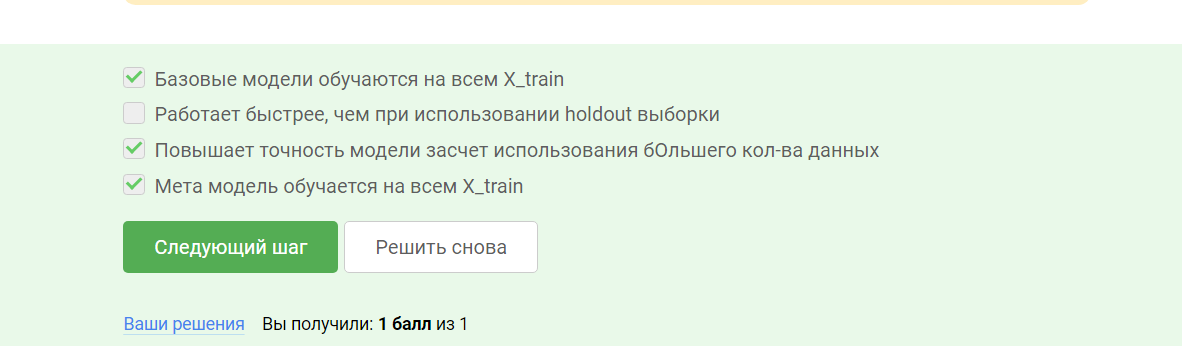

# 6.2.10

В этом степе вам предстоит написать функцию, которая будет получать предсказания модели на всей обучающей выборке при помощи 5 фолдовой кросс-валидации (KFold(n_splits=5)).

Для этого проитерируйтесь по всем фолдам, обучите модель на сэмплах с номерами train_indices и сделайте предсказания на сэмплы с номерами val_indices. После этого соедините все полученные предсказания, в том порядке, в котором вы делали для них предсказания (этот порядок будет равен обычному) и верните получившийся массив.

Примечание:

train_indices и val_indices - это индексы, то есть обращаться к ним нужно через X.loc[]



In [ ]:
def GetPreds(model, X, y, n_fold=5):
    """
    model - имеет методы .fit(X, y) и .predict(X)
    X - pd.DataFrame
    y - np.array
    """
    folds = KFold(n_splits=n_fold)
    preds = np.empty((0,1), float)

    for train_indices, val_indices in folds.split(X, y):
        #your code here

    return preds.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def GetPreds(model, X, y, n_fold=5):
    """
    model - имеет методы .fit(X, y) и .predict(X)
    X - pd.DataFrame
    y - np.array
    """
    folds = KFold(n_splits=n_fold)
    preds = np.empty((0,1), float)

    predicts = []

    for train_indices, val_indices in folds.split(X, y):
        model.fit(X.iloc[train_indices], y.iloc[train_indices])
        predicts.append(model.predict(X.iloc[val_indices]))
        preds.append(predicts)

    return preds.reshape(-1, 1)

In [ ]:
# моё финальное решение

def GetPreds(model, X, y, n_fold=5):
    """
    model - имеет методы .fit(X, y) и .predict(X)
    X - pd.DataFrame
    y - np.array
    """
    folds = KFold(n_splits=n_fold)
    preds = np.empty((0,1), float)

    for train_indices, val_indices in folds.split(X, y):
        model.fit(X.iloc[train_indices], y[train_indices])
        preds = np.append(preds, model.predict(X.iloc[val_indices]))

    return preds.reshape(-1, 1)

In [ ]:
import numpy as np

In [ ]:
folds = KFold(n_splits=5)
preds = np.empty((0,1), float)
fold_number = 0

predicts = []

for train_indices, val_indices in folds.split(X, y):
    print(fold_number)
    fold_number += 1
    print(train_indices.shape)
    predicts.append(train_indices)
    # preds = np.append(predicts)

0
(240,)
1
(240,)
2
(240,)
3
(240,)
4
(240,)


In [ ]:
np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
predicts = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
preds.extend(predicts)
preds

AttributeError: ignored

In [ ]:
np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
preds = np.empty((0,1), float)
preds

array([], shape=(0, 1), dtype=float64)

In [ ]:
preds = np.append(preds, [1,2])
preds.reshape(-1, 1)

array([[1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.]])

In [ ]:
# preds = np.hstack((preds, [1, 2, 3]))

preds = np.hstack((preds, [4, 5, 6]))
preds

ValueError: ignored

In [ ]:
g = [[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
     [4.6, 3.1, 1.5, 0.2]]

g = np.array(g)
g.shape

(5, 4)

In [ ]:
g.reshape(-1, 1)

array([[5.1],
       [3.5],
       [1.4],
       [0.2],
       [4.9],
       [3. ],
       [1.4],
       [0.2],
       [4.7],
       [3.2],
       [1.3],
       [0.2],
       [4.6],
       [3.1],
       [1.5],
       [0.2],
       [4.6],
       [3.1],
       [1.5],
       [0.2]])

In [ ]:
# авторское решение

def GetPreds(model, X, y, n_fold=5):
    folds = KFold(n_splits=n_fold)
    preds = np.empty((0,1),float)

    for train_indices, val_indices in folds.split(X, y):
        X_train, X_val = X.loc[train_indices], X.loc[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        model.fit(X_train, y_train)
        preds = np.append(preds, model.predict(X_val))

    return preds.reshape(-1, 1)

# 6.2.11

Добавляем X_test
Модифицируйте функцию из предыдущей задачи, чтобы она помимо предсказаний на весь X еще возвращала предсказания на X_test. Для того, чтобы получить предсказания на X_test обучите данную модель сразу на всей выборке.

Примечание:

train_indices и val_indices - это индексы, то есть обращаться к ним нужно через X.loc[]

In [ ]:

# my variant
def GetPreds(model, X, y, X_test, n_fold=5):
    """
    model - имеет методы .fit(X, y) и .predict(X)
    X - pd.DataFrame
    y - np.array
    X_test - pd.DataFrame, для которого нужно сделать предсказания
    """
    folds = KFold(n_splits=n_fold)
    preds = np.empty((0,1),float)

    for train_indices, val_indices in folds.split(X, y):
        model.fit(X.iloc[train_indices], y[train_indices])
        preds = np.append(preds, model.predict(X.iloc[val_indices]))

    model.fit(X, y)
    test_preds = model.predict(X_test)
    return preds.reshape(len(X), 1), test_preds.reshape(len(X_test), 1)

In [ ]:
# авторское решение

def GetPreds(model, X, y, X_test, n_fold=5):
    """
    model - имеет методы .fit(X, y) и .predict(X)
    X - pd.DataFrame
    y - np.array
    X_test - pd.DataFrame, для которого нужно сделать предсказания
    """
    folds = KFold(n_splits=n_fold)
    preds = np.empty((0,1),float)

    for train_indices, val_indices in folds.split(X, y):
        X_train, X_val = X.loc[train_indices], X.loc[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        model.fit(X_train, y_train)
        preds = np.append(preds, model.predict(X_val))

    model.fit(X, y)

    test_preds = model.predict(X_test)
    return preds.reshape(len(X), 1), test_preds.reshape(len(X_test), 1)

# 6.2.12

У вас датасет текстов постов из социальной сети и вам нужно классифицировать их по 10 темам, к которым они относятся.

Достаем эмбеддинги при помощи языковых моделей

Очень часто в задачах связанными с текстами выстреливает подход с извлечением из текста эмбеддингов и последующего их использования в бустингах или линейных моделях для решения своей задачи.

В рамках данного степа уже достали для каждого текста из датасета эмбеддинги при помощи больших языковых моделей из HuggingFace, а именно использовали 'sberbank-ai/ruBert-base', 'cointegrated/rubert-tiny2', 'DeepPavlov/rubert-base-cased-conversational' и 'sentence-transformers/LaBSE'.

Так что теперь вы можете использовать их, чтобы составить свой невероятный ансамбль и порвать лидерборд.

Задача: получить максимальное качество классификации, метрика - balanced_accuracy_score, классы в тестовой выборке сбалансированны также, как и в обучающей. За каждый процент точности начиная от 70% вы будете получать +1 балл, максимум 10.

In [ ]:

import pandas as pd
import numpy as np

!pip install catboost -q
# !pip install lightgbm -q
# !pip install xgboost -q
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
# import lightgbm as lgb
# from lightgbm import LGBMRegressor, early_stopping, Dataset
# import xgboost as xgb
# from xgboost import XGBRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

## Загрузка данных

In [ ]:
path_train = '/content/text_classification_train.csv'
path_test = '/content/text_classification_test.csv'

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df
     

print('train')
train = import_data(path_train)

print('-' * 80)
print('test')
test = import_data(path_test)
   

train
Memory usage of dataframe is 13.30 MB
Memory usage after optimization is: 3.35 MB
Decreased by 74.8%
--------------------------------------------------------------------------------
test
Memory usage of dataframe is 13.36 MB
Memory usage after optimization is: 3.36 MB
Decreased by 74.8%


In [ ]:
train.head(3)

,category,text,ruBert-base_text_feature_0,ruBert-base_text_feature_1,ruBert-base_text_feature_2,ruBert-base_text_feature_3,ruBert-base_text_feature_4,ruBert-base_text_feature_5,ruBert-base_text_feature_6,ruBert-base_text_feature_7,...,labse_text_feature_758,labse_text_feature_759,labse_text_feature_760,labse_text_feature_761,labse_text_feature_762,labse_text_feature_763,labse_text_feature_764,labse_text_feature_765,labse_text_feature_766,labse_text_feature_767
0,extreme,Ледник Пасторури это цирковой ледник расположе...,0.272217,0.155396,0.060272,0.363037,-0.140381,0.507812,-0.226318,0.431885,...,-0.045807,-0.027481,0.030533,-0.052216,0.042450,-0.012711,-0.055359,-0.012436,-0.016281,-0.006992
1,martial_arts,Главные участники предстоящего Betokenoid 274 ...,0.439209,0.343750,0.093628,0.245239,0.089783,0.424805,-0.071472,0.185913,...,-0.022659,0.042267,-0.027390,-0.033569,0.016022,-0.022049,-0.040375,0.007393,-0.029068,-0.011284
2,extreme,Ttokenoid Btokenoid – карта с которой можно не...,-0.040344,0.058105,-0.091064,0.296143,-0.137085,0.931641,-0.169067,0.131470,...,-0.009460,0.011551,-0.046021,0.024582,-0.013672,-0.047028,0.009392,-0.000488,-0.060272,0.006561


In [ ]:
cat_features = ['text']
cat_features_indxs = [1]
targets = ['category']
features2drop = ['car_id', 'deviation_normal_count']

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print(f'\033[1mcat_features:\033[0m {cat_features}, \033[1mamount\033[0m = {len(cat_features)}')
print(f'\033[1mnum_features:\033[0m {num_features}, \033[1mamount\033[0m = {len(num_features)}')
print(f'\033[1mtargets:\033[0m {targets}, \033[1mamount\033[0m = {len(targets)}')

cat_features: ['text'], amount = 1
num_features: ['ruBert-base_text_feature_0', 'ruBert-base_text_feature_1', 'ruBert-base_text_feature_2', 'ruBert-base_text_feature_3', 'ruBert-base_text_feature_4', 'ruBert-base_text_feature_5', 'ruBert-base_text_feature_6', 'ruBert-base_text_feature_7', 'ruBert-base_text_feature_8', 'ruBert-base_text_feature_9', 'ruBert-base_text_feature_10', 'ruBert-base_text_feature_11', 'ruBert-base_text_feature_12', 'ruBert-base_text_feature_13', 'ruBert-base_text_feature_14', 'ruBert-base_text_feature_15', 'ruBert-base_text_feature_16', 'ruBert-base_text_feature_17', 'ruBert-base_text_feature_18', 'ruBert-base_text_feature_19', 'ruBert-base_text_feature_20', 'ruBert-base_text_feature_21', 'ruBert-base_text_feature_22', 'ruBert-base_text_feature_23', 'ruBert-base_text_feature_24', 'ruBert-base_text_feature_25', 'ruBert-base_text_feature_26', 'ruBert-base_text_feature_27', 'ruBert-base_text_feature_28', 'ruBert-base_text_feature_29', 'ruBert-base_text_feature_30',

In [ ]:
print(f'train shape = {train.shape},  test shape = {test.shape}')
print(f'train, test is null: {train.isna().any().any(), test.isna().any().any()}') 

train shape = (666, 2618),  test shape = (669, 2617)
train, test is null: (True, True)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Columns: 2618 entries, category to labse_text_feature_767
dtypes: category(2), float16(2616)
memory usage: 3.3 MB


In [ ]:
test.head(3)

,text,ruBert-base_text_feature_0,ruBert-base_text_feature_1,ruBert-base_text_feature_2,ruBert-base_text_feature_3,ruBert-base_text_feature_4,ruBert-base_text_feature_5,ruBert-base_text_feature_6,ruBert-base_text_feature_7,ruBert-base_text_feature_8,...,labse_text_feature_758,labse_text_feature_759,labse_text_feature_760,labse_text_feature_761,labse_text_feature_762,labse_text_feature_763,labse_text_feature_764,labse_text_feature_765,labse_text_feature_766,labse_text_feature_767
0,Наступила та самая неделя Nattokenoid Setokeno...,-0.088379,0.065796,0.154907,0.133301,-0.019897,0.390625,-0.242065,0.559570,0.203735,...,-0.042480,-0.028748,-0.035522,0.010765,-0.030228,-0.037018,-0.006439,0.025848,0.000624,-0.022720
1,Тоня Сегодня я записываю свое первое видео на ...,-0.395508,0.051819,0.089111,0.233521,-0.137207,0.408936,-0.123291,0.441406,-0.072083,...,-0.021408,0.006958,0.002678,-0.032379,-0.038818,-0.004978,-0.058075,0.007465,-0.030640,-0.010941
2,Mtokenoid Games дисквалифицировали с мейджора ...,0.017258,0.055817,0.004318,0.209473,-0.144287,0.562988,-0.073242,0.413818,0.116760,...,0.062927,0.046143,0.027664,0.057434,-0.011208,-0.003731,0.006435,-0.031281,-0.057404,-0.017349


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Columns: 2617 entries, text to labse_text_feature_767
dtypes: category(1), float16(2616)
memory usage: 3.2 MB


In [ ]:
X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["category"]

In [ ]:
r_s = 42
n_est = 1000

## Optuna

In [ ]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import KFold, train_test_split

In [ ]:
from optuna.integration import CatBoostPruningCallback

In [ ]:
def fit_catboost(trial, train, val):
    X_train, y_train = train
    X_val, y_val = val

    param = {
        'iterations' : 400, # Можно не перебирать, есть Easrly-Stopping
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.01),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 2, 50),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.8),
        
        "auto_class_weights": trial.suggest_categorical("auto_class_weights", ["SqrtBalanced", "Balanced", "None"]),
        "depth": trial.suggest_int("depth", 3, 9),
        
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "10gb",
        "eval_metric": "Accuracy", # Тоже стоит заранее определиться
    }

    
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
        
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
        

    clf = CatBoostClassifier(
        **param,
        thread_count=-1,
        random_seed=42,
        cat_features=cat_features,
    )
    #  Создаем объект callback
    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")

    clf.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
        verbose=0,
        plot=False,
        early_stopping_rounds=5,
        callbacks=[pruning_callback],
    )

    # запускаем процесс прунинга
    pruning_callback.check_pruned()

    y_pred = clf.predict(X_val)
    return clf, y_pred


In [ ]:
def objective(trial, return_models=False):
    n_splits = 3
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    X_train = train[filtered_features].drop(targets, axis=1, errors="ignore")
    y_train = train["category"]

    scores, models = [], []
    
    for train_idx, valid_idx in kf.split(X_train):
        train_data = X_train.iloc[train_idx, :], y_train.iloc[train_idx]
        valid_data = X_train.iloc[valid_idx, :], y_train.iloc[valid_idx]

        # Подаем trials для перебора
        model, y_pred = fit_catboost(trial, train_data, valid_data) # Определили выше
        scores.append(balanced_accuracy_score(y_pred, valid_data[1]))
        models.append(model)
        break
         

    result = np.mean(scores)
    
    if return_models:
        return result, models
    else:
        return result

In [ ]:
study = optuna.create_study(direction="maximize",
                            pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),)
study.optimize(objective,
               n_trials=600,
               n_jobs = -1,
               show_progress_bar=True,)

[I 2023-04-23 17:25:48,186] A new study created in memory with name: no-name-f5964b31-42fc-4702-8742-f959676f1f49
/usr/local/lib/python3.9/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/600 [00:00<?, ?it/s]

<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:33:09,229] Trial 0 finished with value: 0.2558318082708327 and parameters: {'learning_rate': 0.0022797196787207865, 'l2_leaf_reg': 11, 'colsample_bylevel': 0.23242551785322885, 'auto_class_weights': 'Balanced', 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7422550644857248}. Best is trial 0 with value: 0.2558318082708327.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:43:21,523] Trial 2 finished with value: 0.12456450244911783 and parameters: {'learning_rate': 0.005800620926850202, 'l2_leaf_reg': 49, 'colsample_bylevel': 0.621477051139504, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.136699015254683}. Best is trial 0 with value: 0.2558318082708327.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:44:43,726] Trial 3 finished with value: 0.28474575565218835 and parameters: {'learning_rate': 0.006335262874547616, 'l2_leaf_reg': 12, 'colsample_bylevel': 0.5764008715937846, 'auto_class_weights': 'None', 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 18.907037315478853}. Best is trial 3 with value: 0.28474575565218835.


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:45:05,689] Trial 1 finished with value: 0.25935642375270856 and parameters: {'learning_rate': 0.0025829209691109528, 'l2_leaf_reg': 34, 'colsample_bylevel': 0.47085978481497653, 'auto_class_weights': 'None', 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.28474575565218835.
[I 2023-04-23 17:45:35,500] Trial 4 finished with value: 0.12395032503728155 and parameters: {'learning_rate': 0.006423422522009737, 'l2_leaf_reg': 41, 'colsample_bylevel': 0.38706322557501877, 'auto_class_weights': 'Balanced', 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 12.599400594509877}. Best is trial 3 with value: 0.28474575565218835.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:53:01,753] Trial 6 finished with value: 0.2806272285811928 and parameters: {'learning_rate': 0.003206939324358384, 'l2_leaf_reg': 19, 'colsample_bylevel': 0.5523224925639711, 'auto_class_weights': 'Balanced', 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.28474575565218835.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:54:48,211] Trial 7 pruned. Trial was pruned at iteration 7.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 17:56:11,105] Trial 8 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:01:29,428] Trial 9 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:01:57,896] Trial 10 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:02:02,307] Trial 11 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:07:21,097] Trial 12 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:09:31,901] Trial 13 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:15:30,493] Trial 14 pruned. Trial was pruned at iteration 15.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:24:27,575] Trial 15 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:25:01,310] Trial 16 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:26:42,363] Trial 17 pruned. Trial was pruned at iteration 8.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:47:10,799] Trial 5 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 18:59:17,114] Trial 19 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 19:00:18,306] Trial 20 finished with value: 0.20787992589823687 and parameters: {'learning_rate': 0.0057473643944431115, 'l2_leaf_reg': 25, 'colsample_bylevel': 0.6598329789853887, 'auto_class_weights': 'Balanced', 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.28474575565218835.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 19:11:27,372] Trial 18 finished with value: 0.30985538083683867 and parameters: {'learning_rate': 0.003438196183787822, 'l2_leaf_reg': 26, 'colsample_bylevel': 0.49877678041213863, 'auto_class_weights': 'Balanced', 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 18 with value: 0.30985538083683867.
[I 2023-04-23 19:31:16,262] Trial 21 finished with value: 0.22094946388712966 and parameters: {'learning_rate': 0.0010668352410382466, 'l2_leaf_reg': 15, 'colsample_bylevel': 0.4960164434120844, 'auto_class_weights': 'Balanced', 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 18 with value: 0.30985538083683867.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 19:32:37,859] Trial 22 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 19:59:15,923] Trial 23 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 20:02:29,548] Trial 25 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 20:35:35,285] Trial 24 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 20:36:09,258] Trial 27 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 21:10:44,968] Trial 26 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 21:12:07,088] Trial 29 pruned. Trial was pruned at iteration 5.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 21:13:32,012] Trial 30 pruned. Trial was pruned at iteration 9.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


[I 2023-04-23 21:17:50,343] Trial 31 pruned. Trial was pruned at iteration 8.


<ipython-input-35-db466a5c6fa1>:35: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "Accuracy")


In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")

for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
print("Best trial: score {}, params {}".format(study.best_trial.value, study.best_trial.params))

In [ ]:
valid_scores, models = objective(
    optuna.trial.FixedTrial(study.best_params),
    return_models=True,
)

In [ ]:
valid_scores, len(models)

In [ ]:
# Важность параметров
optuna.visualization.plot_param_importances(study)

##Kfold

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["category"]

n_splits = 3
clfs = []
# scores = []
acc_scores = []

kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for num, (train_index, test_index) in enumerate(kf.split(X)):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf = CatBoostClassifier(
      cat_features=cat_features
      )
  clfs.append(clf)

  clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=False, plot=False)
   

  y_pred = clf.predict(X_test)  
  
  acc_score = balanced_accuracy_score(y_test.values, y_pred)

  print(f'fold: {num} acc: {acc_score}')
  # score = np.mean(np.array(y_pred == y_test.values))
  # scores.append(score)
  # print(f"fold: {num} acc: {score}")
  acc_scores.append(acc_score)

assert len(clfs) == n_splits  # Проверка, что все ок

# Считаем среднее и дисперсию по всем фолдам
print("mean accuracy score --", np.mean(acc_score, dtype="float16"), np.std(acc_score).round(4))    

fold: 0 acc: 0.5073460946716484
fold: 1 acc: 0.4729106300938881
fold: 2 acc: 0.450302695042514
mean accuracy score -- 0.4502 0.0


In [ ]:

import pickle

with open(f'model.pkl', "wb") as f:
        pickle.dump(clf, f)